In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('F:/newdata/train', target_size = (256, 256), batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('F:/newdata/test', target_size = (256, 256), batch_size = 32, class_mode = 'binary')

Found 19697 images belonging to 2 classes.
Found 10561 images belonging to 2 classes.


In [3]:
# Define the model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(synchronized=True))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(synchronized=True))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(synchronized=True))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0

In [5]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto',verbose=1, patience=10)

In [7]:
# Train the model
hist= model.fit(training_set, epochs = 100, validation_data = test_set,callbacks=[callback])

Epoch 1/100
616/616 [==============================] - 2927s 5s/step - loss: 6.3376 - accuracy: 0.6601 - val_loss: 0.7529 - val_accuracy: 0.6916
Epoch 2/100
616/616 [==============================] - 2733s 4s/step - loss: 0.6235 - accuracy: 0.7132 - val_loss: 0.5696 - val_accuracy: 0.7319
Epoch 3/100
616/616 [==============================] - 2582s 4s/step - loss: 0.5639 - accuracy: 0.7348 - val_loss: 0.9698 - val_accuracy: 0.6007
Epoch 4/100
616/616 [==============================] - 2617s 4s/step - loss: 0.5323 - accuracy: 0.7451 - val_loss: 0.4822 - val_accuracy: 0.7692
Epoch 5/100
616/616 [==============================] - 2586s 4s/step - loss: 0.5274 - accuracy: 0.7485 - val_loss: 0.5714 - val_accuracy: 0.7057
Epoch 6/100
616/616 [==============================] - 2661s 4s/step - loss: 0.5246 - accuracy: 0.7529 - val_loss: 0.4546 - val_accuracy: 0.7799
Epoch 7/100
616/616 [==============================] - 2660s 4s/step - loss: 0.5228 - accuracy: 0.7513 - val_loss: 0.4922 - val_ac

In [8]:
import matplotlib.pyplot as plt

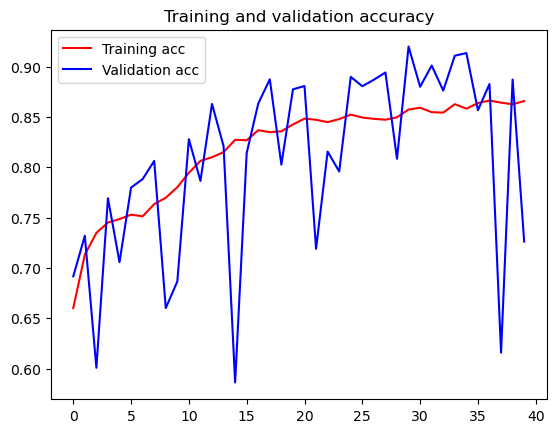

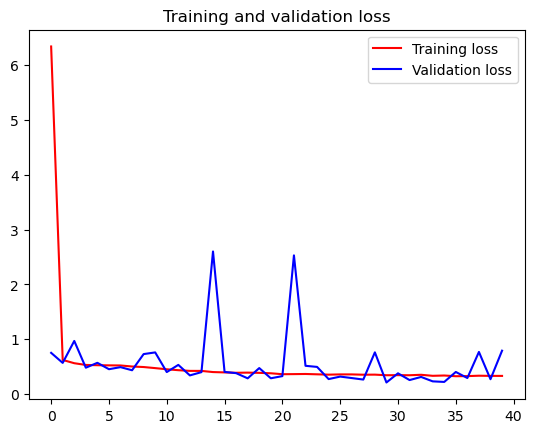

In [10]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(40)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_set)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

331/331 [==============================] - 194s 586ms/step - loss: 0.7923 - accuracy: 0.7262
Test loss: 0.7922741174697876
Test accuracy: 0.726162314414978


In [12]:
classname=test_set.class_indices

In [13]:
classname

{'nude': 0, 'safe': 1}

In [14]:
import numpy as np

In [15]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/adult.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 422ms/step
0.0
nude


In [16]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/adult3.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 60ms/step
0.0
nude


In [17]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/adult4.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 164ms/step
0.0
nude


In [18]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/adult6.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 112ms/step
0.0
nude


In [19]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/adult7.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 62ms/step
0.0
nude


In [20]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/download.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 94ms/step
0.0
nude


In [21]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/download2.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 98ms/step
0.0
nude


In [22]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/download3.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 189ms/step
0.0
nude


In [23]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/images.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 206ms/step
0.0
nude


In [24]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/images2.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 128ms/step
0.0
nude


In [37]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/safe4.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 1s 534ms/step
0.0
nude


In [38]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/nadult4.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 406ms/step
0.0
nude


In [35]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/safe.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 1s 1s/step
0.0
nude


In [39]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/safe2.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 445ms/step
0.0
nude


In [40]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/safe.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 0s 376ms/step
0.0
nude


In [41]:
img = tf.keras.utils.load_img(
    'F:/mk/nudeimages/safe3.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions[0][0])

if predictions[0][0]==1:
    print('safe')
else:
    print('nude')

1/1 [==============================] - 1s 504ms/step
0.0
nude


In [42]:
model.save('BNnewnude.h5')